<a href="https://colab.research.google.com/github/AxelBattut/Trading-Bot/blob/main/TwitterDyor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install twitter

     |████████████████████████████████| 50 kB 6.6 MB/s 


In [ ]:
pip install requests

In [ ]:
pip install python-binance

     |████████████████████████████████| 63 kB 2.8 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 56.5 MB/s 
     |████████████████████████████████| 288 kB 58.3 MB/s 
     |████████████████████████████████| 103 kB 65.3 MB/s 
     |████████████████████████████████| 160 kB 59.3 MB/s 
     |████████████████████████████████| 192 kB 61.5 MB/s 
     |████████████████████████████████| 271 kB 58.2 MB/s 


In [ ]:
!pip install tweepy

In [40]:
pip install textblob

In [ ]:
import tweepy 
import pandas as pd
consumer_key = "ovAUJWFp4AkjlSHMviEPTCvnp"
consumer_secret = "KhRaRsRBzRYhkjgbS9yCA7EMHKn1g3xLUQiNkDkR173deMGVIl"
access_token = "1343316681695895552-jOOG8ZYWod4DBPxclsgQfXZ5oP8vTO"
access_token_secret = "lr5l1TK3VelIlYXJVBsy9mlB9qo6yOXOMtq6MyYqQ20H1"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

get full text of a certain person tweet

In [ ]:
cursor = tweepy.Cursor(api.user_timeline, id='0xJokeIsHere', tweet_mode="extended").items(1)
for i in cursor:
  #print(dir(i))
  print(i.full_text)

@Apedignio Évitez @crypto_futur @CryptoMatrix2 vous êtes débutants, vous gagnerez du temps


get a containing keyword tweet

In [ ]:
cursor = tweepy.Cursor(api.search, q="eth maxi", tweet_mode="extended").items(10)
for i in cursor:
  
  print(i.full_text)

@MilottoETH @coinspotau @terra_money @MIM_Spell late?how to late if $UST is table coin eth maxi?
@TheCryptoLark Yep, Ethereum itself ... it is just broken and trying to fix it ain't gonna work. At least not in time (that is before some other protocol fixed all that is wrong with ETH) Why are ETH maxi's so stubborn I wonder all the time, you enjoyed the ride so far now just face the reality
@jirichlebus Pls nezdielaj maxi hoaxy a zachovaj si dekorum. Decentralizacia sa dosť tazko mera a decentralizovane mozu byt rozne vlastnosti. V niektorých je viac decentralizovane Eth, v niektorych Btc. Dobra snaha merat je napr Nakamoto koeficient https://t.co/wP6WO1USV7
@StoneyBtc Founder of smart contracts on Bitcoin
Apologies for other blockchains

Smells like ETH maxi to me
RT @cleanunicorn: Great chat between @lrettig and an unknown Bitcoin maxi.

https://t.co/1pzyK3lWYA

Discussing
🎡Distributed systems
👺Nakam…
Great chat between @lrettig and an unknown Bitcoin maxi.

https://t.co/1pzyK3lWYA

D

Make it wap wap wap

In [41]:
import tweepy 
import pandas as pd
import csv
from datetime import datetime
from datetime import date, timedelta
import numpy as np
import requests
import json
from textblob import TextBlob

consumer_key = "ovAUJWFp4AkjlSHMviEPTCvnp"
consumer_secret = "KhRaRsRBzRYhkjgbS9yCA7EMHKn1g3xLUQiNkDkR173deMGVIl"
access_token = "1343316681695895552-jOOG8ZYWod4DBPxclsgQfXZ5oP8vTO"
access_token_secret = "lr5l1TK3VelIlYXJVBsy9mlB9qo6yOXOMtq6MyYqQ20H1"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
#api = tweepy.API(auth, wait_on_rate_limit=True)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) #pour empecher que l'erreur 429 se produise, attention ce n'est pas optimal, le programme va simplement se lancer lorsque mon api aura des crédits donc autant limiter directement son nombre de requetes

In [ ]:



number_of_tweets = 15 #attention, ici on peut etre tenté d'en mettre un seul parce que l'on veut accèder seulement à un seul tweet (binance usdt pair) mais cela ne veut pas dire que ce tweet est forcement le dernier 
tweets = []
likes = []
time=[]

for i in tweepy.Cursor(api.user_timeline, id="DYORCryptoBot", tweet_mode="extended").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)
  

df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})


df = df[~df.tweets.str.contains("FTX")]
df = df[~df.tweets.str.contains("KuCoin")]
df = df[~df.tweets.str.contains("#BTC")]
df = df[~df.tweets.str.contains("#Bitcoin")]
df = df[~df.tweets.str.contains("4h")]
df = df.reset_index(drop=True)

df






,tweets,likes,time
0,[SCAN RESULTS - 15m - #USDT PAIR]\n\nExchange:...,0,2022-01-07 12:15:59
1,[SCAN RESULTS - 15m - #USDT PAIR]\n\nExchange:...,1,2022-01-07 11:45:59


In [ ]:
mostlike =df.loc[df.likes.nlargest(5).index]
mostlike

,tweets,likes,time
1,[SCAN RESULTS - 15m - #USDT PAIR]\n\nExchange:...,1,2022-01-07 11:45:59
0,[SCAN RESULTS - 15m - #USDT PAIR]\n\nExchange:...,0,2022-01-07 12:15:59


In [ ]:
import re 
line_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in line_of_sentences:
  words =sentence.split()
  for w in words:
    lines.append(w)
#j'ai split mes elements de df en une liste de words 
#print(lines[1:])
results = []
for element in lines:
    for x in element:
        if x == '$':
            x =  element.index('$')
            results.append(element[x+1:])
results
#results est bel et bien la liste de mot que pourrai utiliser par la suite (pour index pas tant que ca mais surtout pour mon csv a renseigner pour binance)

['FXS',
 'C98',
 'IRIS',
 'ATOM',
 'ONE',
 'REQ',
 'ZRX',
 'XTZ',
 'LIT',
 'DYDX',
 'UTK',
 'ATOM',
 'FXS',
 'ONE',
 'IRIS',
 'PAXG',
 'IRIS',
 'NMR',
 'KP3R',
 'PORTO']

CREATION INDEX DE CONFIANCE MADE BY DRAGON

In [87]:

nombre_apparition_token = []
tokens = []
entropytoken = []
for w in range(10):

  number_of_tweets = 40 
  tweets = []
  likes = []
  time=[]

  for i in tweepy.Cursor(api.search, q=results[w], tweet_mode="extended").items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)



  df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})

  now = datetime.now()

  #yesterday = now - datetime.timedelta(days=1)

  dt_string = (now- timedelta(0.002)).strftime("%Y-%m-%d %H:%M:%S") #0.04 = 1h
  #print("date and time =", dt_string)
  df = df[~(df['time'] < dt_string)]

  df = df[~df.tweets.str.contains("RT")]
  df = df.reset_index(drop=True)

  #df

  #total_rows = df.count
  #print(total_rows)
  #print(len(df.index))

  nombre_apparition_token.append(len(df.index))
  tokens.append(results[w])


print(nombre_apparition_token)
print(tokens)


somme_apparition_tokens = 0
for f in range(9):
  somme_apparition_tokens = somme_apparition_tokens + nombre_apparition_token[f]

print("Les 10 assets ont été mentionnés un total de ", somme_apparition_tokens)

for h in range(10):
  nb_non_weighted = nombre_apparition_token[h] / somme_apparition_tokens
  entropytoken.append(nb_non_weighted)
print(entropytoken)






[1, 0, 32, 15, 12, 33, 0, 11, 21, 1]
['FXS', 'C98', 'IRIS', 'ATOM', 'ONE', 'REQ', 'ZRX', 'XTZ', 'LIT', 'DYDX']
Les 10 assets ont été mentionnés un total de  125
[0.008, 0.0, 0.256, 0.12, 0.096, 0.264, 0.0, 0.088, 0.168, 0.008]


In [ ]:
import plotly.express as px
import numpy
 
fig = px.pie(values=nombre_apparition_token, names=tokens, color_discrete_sequence=px.colors.sequential.RdBu, title="Répartition du nombre de tweets citant un token dans les dernières 3 minutes")
fig.show()

In [71]:
def get_related_tweets(key_word):
    twitter_users = []
    tweet_time = []
    tweet_string = [] 
    for tweet in tweepy.Cursor(api.search,q=key_word, count=100).items(100):
            if (not tweet.retweeted) and ('RT @' not in tweet.text):
                if tweet.lang == "en":
                    twitter_users.append(tweet.user.name)
                    tweet_time.append(tweet.created_at)
                    tweet_string.append(tweet.text)
                    #print([tweet.user.name,tweet.created_at,tweet.text])
    df = pd.DataFrame({'name':twitter_users, 'time': tweet_time, 'tweet': tweet_string})
    
    return df

#get_related_tweets("Dragon")

Number of Positive Tweets about $BTC 12
Number of Negative Tweets about $BTC 11
Number of Positive Tweets about FXS 25
Number of Negative Tweets about FXS 3
Number of Positive Tweets about C98 10
Number of Negative Tweets about C98 6
Number of Positive Tweets about IRIS 8
Number of Negative Tweets about IRIS 2
Number of Positive Tweets about ATOM 4
Number of Negative Tweets about ATOM 2
Number of Positive Tweets about ONE 14
Number of Negative Tweets about ONE 4
Number of Positive Tweets about REQ 3
Number of Negative Tweets about REQ 0
Number of Positive Tweets about ZRX 13
Number of Negative Tweets about ZRX 7
Number of Positive Tweets about XTZ 9
Number of Negative Tweets about XTZ 3
Number of Positive Tweets about LIT 11
Number of Negative Tweets about LIT 0
Number of Positive Tweets about DYDX 15
Number of Negative Tweets about DYDX 7


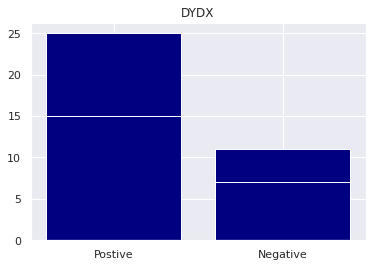

In [89]:


import seaborn as sns
import matplotlib.pyplot as plt
def get_sentiment(key_word):
    df = get_related_tweets(key_word)
    df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df['sentiment'] > 0.0]
    df_neg = df[df['sentiment'] < 0.0]
    
    print("Number of Positive Tweets about {}".format(key_word), len(df_pos))
    print("Number of Negative Tweets about {}".format(key_word), len(df_neg))
    sns.set()
    labels = ['Postive', 'Negative']
    heights = [len(df_pos), len(df_neg)]
    plt.bar(labels, heights, color = 'navy')
    plt.title(key_word)
    return (len(df_pos)/(len(df_neg)+1))
    

get_sentiment("$BTC")
#return (len(df_pos)/len(df_neg))
list_index_humeur_asset = []
for i in range(10):
  list_index_humeur_asset.append(get_sentiment(results[i]))



On affiche le graphe de dernier token mentionné, juste pour avoir une représentation graphique

In [90]:
entropytoken_around_one = []
for u in range(len(entropytoken)):
  entropytoken_around_one.append( (entropytoken[u] - np.min(entropytoken)) / (np.max(entropytoken) - np.min(entropytoken)) + 0.5) #on a centré nos valeurs entre 0.5 et 1.5

print(entropytoken_around_one)
for y in range(len(entropytoken_around_one)):
  if(entropytoken_around_one[y] <1):
    entropytoken_around_one[y] = entropytoken_around_one[y] + entropytoken_around_one[y] * 0.2
  else:
    entropytoken_around_one[y] = entropytoken_around_one[y] - entropytoken_around_one[y] * 0.2

#on a davantage centré nos valeurs autour de 1
print(entropytoken_around_one)

#moyenne = np.mean(entropytoken)
#def NormalizeData(data):
#    return (data - np.min(data)) / (np.max(data) - np.min(data))

[0.5303030303030303, 0.5, 1.4696969696969697, 0.9545454545454546, 0.8636363636363636, 1.5, 0.5, 0.8333333333333333, 1.1363636363636362, 0.5303030303030303]
[0.6363636363636364, 0.6, 1.1757575757575758, 1.1454545454545455, 1.0363636363636364, 1.2, 0.6, 0.9999999999999999, 0.909090909090909, 0.6363636363636364]


Majeur Problème : erreur 429, trop de requêtes pour l'api. Le contourner ? Faire un echantillon sur une période plus courte : 5 minutes et rechercher moins de tweets maximum : 100. Pb : peut etre moins représentatif de la tendance generale. Pour autant le plus important est d'avoir un bot fonctionnel 24/24 donc concession prise

MAINTENANT : Recuperation du prix actuel de notre asset pour savoir combien de cet asset va t'on acheter (attention de bien avoir un nombre rond)

In [95]:
import requests

r = requests.get("https://api.coingecko.com/api/v3/coins/list")
retour = r.json()
list1 =["btc","eth","link","bch","vet","ada","strax","ada","mbl",'gxs']
list2 = results[:10]

list = []
for i in list2:

  list.append(i.lower())

print(list)

listId=[]
for l in list :
    for token in retour:
        if token["symbol"] == l:
            l = token['id']
            listId.append(l)

print(listId)
base_url = "https://api.coingecko.com/api/v3"
liste_prix_assets = []
for u in listId:

  url = base_url + f"/simple/price?ids={u}&vs_currencies=usd"
  r = requests.get(url)
  #print(r.json())
  #print(r.json()[ids]['usd']) #on affiche sa valeur 
  liste_prix_assets.append(r.json()[u]['usd'])

print(liste_prix_assets)




nb_assets_achat = []
for d in liste_prix_assets:
  nb_assets_achat.append(20/d) #on allocate 20 usd pour chacun des 10 tokens

#print(nb_assets_achat)




#ON ECRIT DANS NOTRE FICHIER CSV
quantite_calculee = nb_assets_achat
#quantite_calculee = retour_nb_assets_achat()
#print(quantite_calculee)

file = open("position.csv", "w")
writer = csv.writer(file)


token = []
usdtpair = "USDT"
lastlistedtokens = results[:10] #nos 20 derniers resultats ouai on prend du large
for x in range(len(lastlistedtokens)):
  token.append(lastlistedtokens[x] + 'USDT') #on cree la paire qui doit etre respectee

position = [0,0,0,0,0,0,0,0,0,0]
quantite = []
for c in quantite_calculee:
  quantite.append(round(c, 8))

print(quantite)

colonne3 = ['quantity']
colonne2 = ['position']
colonne1 = ['Currency']
for w in range(1):
  writer.writerow([colonne1[w], colonne2[w],colonne3[w]])
  #writer.writerow(['Currency'],['position'],['quantity'])
#print(len(token))
#print(len(position))
#print(len(quantite))
for w in range(10):
  
  writer.writerow([token[w], position[w],round(quantite[w], 3)]) #on remplit direct le doc

file.close()



['fxs', 'c98', 'iris', 'atom', 'one', 'req', 'zrx', 'xtz', 'lit', 'dydx']
['frax-share', 'coin98', 'iris-network', 'cosmos', 'harmony', 'request-network', '0x', 'tezos', 'litentry', 'dydx']
[37.88, 2.44, 0.103512, 42.4, 0.311682, 0.304588, 0.735355, 4.16, 2.59, 7.01]
[0.5279831, 8.19672131, 193.21431332, 0.47169811, 64.16796607, 65.66246865, 27.19774803, 4.80769231, 7.72200772, 2.85306705]


In [ ]:

import requests
import json
def retour_nb_assets_achat():

  liste_prix_assets = []
  for o in range(9):
    
    montoken = str(results[o]) #on va chercher notre token
    #print(montoken)

    if(montoken == 'GXS'):
      montoken = "BTC"

    base_url = "https://api.coingecko.com/api/v3"
    url = base_url + "/coins/list"

    r = requests.get(url, headers ={"accept":"application/json"})
    

    

    identifiers = r.json()
    symbol_id_map = {d["symbol"]:d["id"] for d in identifiers}
    symbols = [montoken]
    ids = [symbol_id_map[symbol.lower()] for symbol in symbols] #j'ai des ptn d'erreurs pour certains tokens wtf j'en pu
    ids = ",".join(ids)
    url = base_url + f"/simple/price?ids={ids}&vs_currencies=usd"
    r = requests.get(url)
    #print(r.json())
    #print(r.json()[ids]['usd']) #on affiche sa valeur 
    liste_prix_assets.append(r.json()[ids]['usd'])

  print(liste_prix_assets)
  nb_assets_achat = []
  for d in range(10):
    nb_assets_achat.append(20/liste_prix_assets[d]) #on allocate 20 usd pour chacun des 10 tokens

  print(nb_assets_achat)
  return(nb_assets_achat)

retour_nb_assets_achat()


  
quantite_calculee = []
quantite_calculee = retour_nb_assets_achat()
print(quantite_calculee)

file = open("position.txt", "w")
writer = csv.writer(file)


token = []
usdtpair = "USDT"
lastlistedtokens = results[:19] #nos 20 derniers resultats ouai on prend du large
for x in range(len(lastlistedtokens)):
  token.append(lastlistedtokens[x] + 'USDT') #on cree la paire qui doit etre respectee

position = [0,0,0,0,0,0,0,0,0,0]
quantite = quantite_calculee


colonne3 = ['quantity']
colonne2 = ['position']
colonne1 = ['Currency']
for w in range(1):
  writer.writerow([colonne1[w], colonne2[w],colonne3[w]])
  #writer.writerow(['Currency'],['position'],['quantity'])


for w in range(10):


  writer.writerow([token[w], position[w],quantite[w]]) #on remplit direct le doc

file.close()


[1306.0, 42814, 1.29e-10, 39.48, 335.89, 23.97, 520.37, 10.53, 314.05]
[0.015313935681470138, 0.00046713691783061614, 155038759689.9225, 0.5065856129685917, 0.05954330286701003, 0.8343763037129746, 0.03843419105636374, 1.8993352326685662, 0.06368412673141219]


JSONDecodeError: ignored

Export fichier csv

In [92]:
def create_file_csv():
  
  quantite_calculee = []
  quantite_calculee = retour_nb_assets_achat()
  print(quantite_calculee)

  file = open("position.csv", "w")
  writer = csv.writer(file)

  
  token = []
  usdtpair = "USDT"
  lastlistedtokens = results[:19] #nos 20 derniers resultats ouai on prend du large
  for x in range(len(lastlistedtokens)):
    token.append(lastlistedtokens[x] + 'USDT') #on cree la paire qui doit etre respectee

  position = [0,0,0,0,0,0,0,0,0,0]
  quantite = quantite_calculee


  colonne3 = ['quantity']
  colonne2 = ['position']
  colonne1 = ['Currency']
  for w in range(1):
    writer.writerow([colonne1[w], colonne2[w],colonne3[w]])
    #writer.writerow(['Currency'],['position'],['quantity'])

  for w in range(9):


    writer.writerow([token[w], position[w],quantite[w]]) #on remplit direct le doc

  file.close()

Implementation BINANCE BOT

In [93]:
from binance.client import Client
import pandas as pd
client = Client('FtcotsVn6EUIC6I0pUVc69aX5F5tnrVdSRV2r8lXdohFbrfsbrFGqP1VsTt2LvUe','y9yyJdUfEVqyjqKbGMY0V4SK2KRsinV83nTW5WEsxV4JdOCjTwCooAVzwKD1MpxP')

In [94]:
import pandas as pd
from google.colab import files
#uploaded = files.upload()
import io
#posframe = pd.read_csv(io.BytesIO(uploaded['position.csv']))

posframe = pd.read_csv('position.csv')


#posframe = pd.read_csv('position')
posframe

,Currency,position,quantity
0,FXSUSDT,0,0.528
1,C98USDT,0,8.163
2,IRISUSDT,0,192.829
3,ATOMUSDT,0,0.472
4,ONEUSDT,0,63.821
5,REQUSDT,0,65.662
6,ZRXUSDT,0,27.125
7,XTZUSDT,0,4.773
8,LITUSDT,0,7.722


In [ ]:
def changepos(curr, buy=True):
  if buy:
    posframe.loc[posframe.Currency == curr, 'position'] =1 #positionnement achat ou non
  else:
    posframe.loc[posframe.Currency == curr, 'position'] =0

  posframe.to_csv('position', index=False) #tjrs actualiser notre dataset en mettant l'index comme une non colonne

In [ ]:
def gethourlydata(symbol):
  #klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
  #framebis = client.get_historical_klines(symbol, '1 hour ago UTC', '25 hours ago UTC')
  frame = pd.DataFrame(client.get_historical_klines(symbol, '1h', '25 hours ago UTC')) #1h for the fast sma, 25h for the slow sma

  frame =frame.iloc[:,:5] #only the five first columns
  frame.columns = ['Time','Open','High','Low','Close'] #rename it
  frame[['Open','High','Low','Close']] = frame[['Open','High','Low','Close']].astype(float)
  frame.Time = pd.to_datetime(frame.Time, unit='ms')

  return frame

In [ ]:
df = gethourlydata("BTCUSDT")

def applytechnicals(df): #on cherche a savoir si Fastsma 
  df['FastSMA'] = df.Close.rolling(7).mean()
  df['SlowSMA'] = df.Close.rolling(25).mean() #25 timesteps

applytechnicals(df)
df


,Time,Open,High,Low,Close,FastSMA,SlowSMA
0,2022-01-06 12:00:00,42878.33,43077.00,42632.44,43062.76,NaN,NaN
1,2022-01-06 13:00:00,43062.77,43200.00,42900.00,43150.01,NaN,NaN
2,2022-01-06 14:00:00,43150.00,43267.09,42761.90,42805.50,NaN,NaN
3,2022-01-06 15:00:00,42805.50,43019.71,42666.00,42950.01,NaN,NaN
4,2022-01-06 16:00:00,42950.02,43131.76,42725.09,42882.22,NaN,NaN
5,2022-01-06 17:00:00,42882.23,43175.66,42790.89,43005.29,NaN,NaN
6,2022-01-06 18:00:00,43005.30,43400.00,42982.05,43369.04,43032.118571,NaN
7,2022-01-06 19:00:00,43369.04,43508.78,43224.73,43438.10,43085.738571,NaN
8,2022-01-06 20:00:00,43438.11,43581.30,43111.57,43221.50,43095.951429,NaN
9,2022-01-06 21:00:00,43221.50,43253.29,43066.04,43120.64,43140.971429,NaN


In [85]:
def trader(curr):
  firstqty = posframe[posframe.Currency == curr].quantity.values[0] #on va selectionner la valeur que l'on veut investir 
  #qty = float(round(firstqty, 6))
  #print(qty)


  df = gethourlydata(curr)
  applytechnicals(df)
  lastrow = df.iloc[-1] #on ne s'interesse qu'a la last row
  if not posframe[posframe.Currency == curr].position.values[0]: #si l'on est pas en position
    if lastrow.FastSMA < lastrow.SlowSMA:
      print(round(firstqty,0))
      order = client.create_order(symbol=curr,side='BUY',type='MARKET',quantity= (round(firstqty,0)))

      print(order)
      changepos(curr, buy=True)
     
    else:
      print(f'Not in position {curr} but condition not fulfilled')
  else: #si l'on est deja en position
    print(f'Already in {curr} position')
    if lastrow.SlowSMA > lastrow.FastSMA:
      print(round(firstqty,6))
      order = client.create_order(symbol=curr,side='SELL',type='MARKET',quantity= (round(firstqty,6)))

      print(order)
      changepos(curr, buy=False)



In [86]:
for coin in posframe.Currency:
  trader(coin)

Not in position FXSUSDT but condition not fulfilled
Not in position C98USDT but condition not fulfilled
Not in position IRISUSDT but condition not fulfilled
Not in position ATOMUSDT but condition not fulfilled
Not in position ONEUSDT but condition not fulfilled
65.0
{'symbol': 'REQUSDT', 'orderId': 51518223, 'orderListId': -1, 'clientOrderId': 'JWuqH3IigMoyRK50cqMzNV', 'transactTime': 1641563233131, 'price': '0.00000000', 'origQty': '65.00000000', 'executedQty': '65.00000000', 'cummulativeQuoteQty': '19.89650000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '0.30610000', 'qty': '65.00000000', 'commission': '0.06500000', 'commissionAsset': 'REQ', 'tradeId': 10129535}]}
26.0
{'symbol': 'ZRXUSDT', 'orderId': 492161987, 'orderListId': -1, 'clientOrderId': 'qPM7ss91RAoq3yI5YRMS0Z', 'transactTime': 1641563233945, 'price': '0.00000000', 'origQty': '26.00000000', 'executedQty': '26.00000000', 'cummulativeQuoteQty': '19.07620000', 'status': 'FI